# **Import Library**

In [1]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# **Exploratory Data Analysis (EDA)**

In [4]:
df = pd.read_csv ('/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv')

In [5]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [7]:
df.shape

(246022, 40)

In [8]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [9]:
faktor_HeartAttack = [    
    'Sex','GeneralHealth','PhysicalHealthDays','MentalHealthDays','PhysicalActivities',
    'SleepHours','HadAngina','HadStroke','HadAsthma','HadCOPD','HadDepressiveDisorder',
    'HadKidneyDisease','HadDiabetes','SmokerStatus','AgeCategory',
    'HeightInMeters','WeightInKilograms','BMI','AlcoholDrinkers', 'HadHeartAttack'
]

In [10]:
df_selected = df[faktor_HeartAttack]
df_selected

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadDiabetes,SmokerStatus,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HadHeartAttack
0,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,No,No,No,No,Former smoker,Age 65 to 69,1.60,71.67,27.99,No,No
1,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,Age 70 to 74,1.78,95.25,30.13,No,No
2,Male,Very good,0.0,0.0,No,8.0,No,No,No,No,No,No,No,Former smoker,Age 75 to 79,1.85,108.86,31.66,Yes,No
3,Female,Fair,5.0,0.0,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Age 80 or older,1.70,90.72,31.32,No,No
4,Female,Good,3.0,15.0,Yes,5.0,No,No,No,No,No,No,No,Never smoked,Age 80 or older,1.55,79.38,33.07,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,No,No,No,No,Never smoked,Age 60 to 64,1.78,102.06,32.28,Yes,No
246018,Female,Fair,0.0,7.0,Yes,7.0,No,No,No,No,Yes,No,No,Never smoked,Age 25 to 29,1.93,90.72,24.34,No,No
246019,Male,Good,0.0,15.0,Yes,7.0,No,Yes,No,No,No,No,Yes,Never smoked,Age 65 to 69,1.68,83.91,29.86,Yes,No
246020,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,No,No,No,No,Never smoked,Age 50 to 54,1.70,83.01,28.66,No,No


In [11]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    246022 non-null  object 
 1   GeneralHealth          246022 non-null  object 
 2   PhysicalHealthDays     246022 non-null  float64
 3   MentalHealthDays       246022 non-null  float64
 4   PhysicalActivities     246022 non-null  object 
 5   SleepHours             246022 non-null  float64
 6   HadAngina              246022 non-null  object 
 7   HadStroke              246022 non-null  object 
 8   HadAsthma              246022 non-null  object 
 9   HadCOPD                246022 non-null  object 
 10  HadDepressiveDisorder  246022 non-null  object 
 11  HadKidneyDisease       246022 non-null  object 
 12  HadDiabetes            246022 non-null  object 
 13  SmokerStatus           246022 non-null  object 
 14  AgeCategory            246022 non-nu

In [12]:
for col in df_selected.columns:
    print(f"Value counts for column '{col}':")
    print(df_selected[col].value_counts())
    print("-" * 30)

Value counts for column 'Sex':
Sex
Female    127811
Male      118211
Name: count, dtype: int64
------------------------------
Value counts for column 'GeneralHealth':
GeneralHealth
Very good    86999
Good         77409
Excellent    41525
Fair         30659
Poor          9430
Name: count, dtype: int64
------------------------------
Value counts for column 'PhysicalHealthDays':
PhysicalHealthDays
0.0     152802
30.0     17160
2.0      14728
1.0      10058
3.0       9137
5.0       8939
10.0      6068
7.0       5221
4.0       4906
15.0      4845
20.0      2950
14.0      2813
6.0       1421
25.0      1123
8.0        961
12.0       610
21.0       584
28.0       365
9.0        211
29.0       178
18.0       151
16.0       126
27.0       103
17.0       101
11.0        95
13.0        87
22.0        72
26.0        64
24.0        60
23.0        54
19.0        29
Name: count, dtype: int64
------------------------------
Value counts for column 'MentalHealthDays':
MentalHealthDays
0.0     150454
2.0 

In [13]:
print(df_selected.duplicated().sum())
df_selected = df_selected.drop_duplicates()

7315


HadHeartAttack
No     225280
Yes     13427
Name: count, dtype: int64


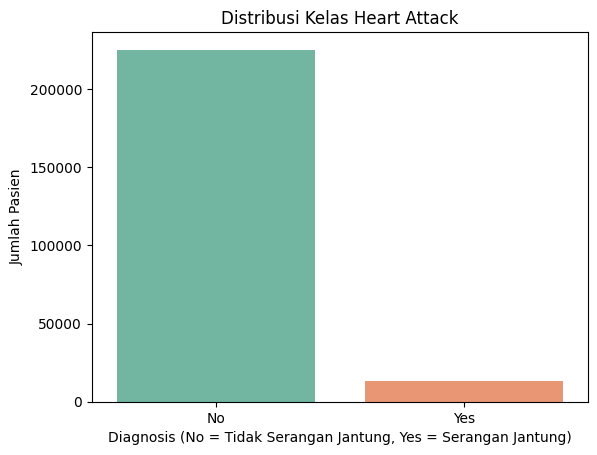

In [14]:
print(df_selected['HadHeartAttack'].value_counts())

sns.countplot(x='HadHeartAttack', data = df_selected, palette='Set2')
plt.title('Distribusi Kelas Heart Attack')
plt.xlabel('Diagnosis (No = Tidak Serangan Jantung, Yes = Serangan Jantung)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [15]:
numeric_features = [
    'PhysicalHealthDays',
    'MentalHealthDays',
    'SleepHours',
    'HeightInMeters',
    'WeightInKilograms',
    'BMI'
]

categorical_features = [
    'Sex',
    'GeneralHealth',
    'PhysicalActivities',
    'HadAngina',
    'HadStroke',
    'HadAsthma',
    'HadCOPD',
    'HadDepressiveDisorder',
    'HadKidneyDisease',
    'HadDiabetes',
    'SmokerStatus',
    'AgeCategory',
    'AlcoholDrinkers'
]

target_feature = 'HadHeartAttack'

**deteksi outlier dengan IQR**

Jumlah outlier pada kolom PhysicalHealthDays: 38801
Jumlah outlier pada kolom MentalHealthDays: 31921
Jumlah outlier pada kolom SleepHours: 3488
Jumlah outlier pada kolom HeightInMeters: 829
Jumlah outlier pada kolom WeightInKilograms: 5936
Jumlah outlier pada kolom BMI: 7134


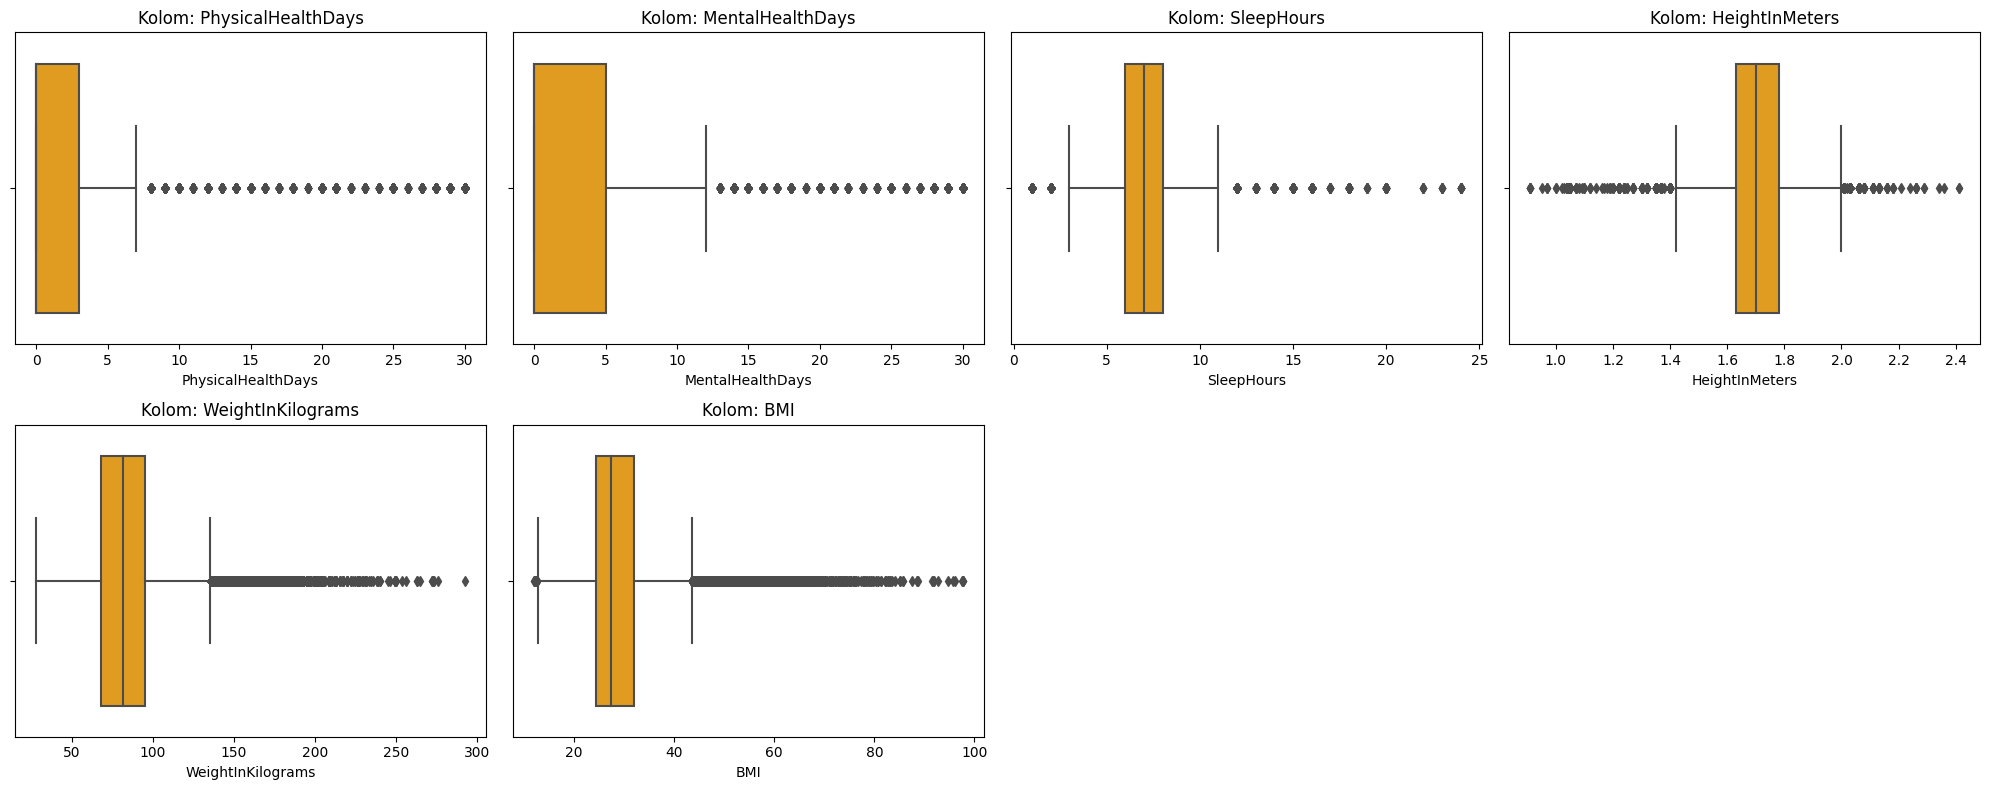


Jumlah total nilai outlier dari semua kolom: 88109
Jumlah baris unik yang mengandung outlier: 65674


In [16]:
def deteksi_outlier_iqr(df_selected, column):
    Q1 = df_selected[column].quantile(0.25)
    Q3 = df_selected[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_selected[(df_selected[column] < lower_bound) | (df_selected[column] > upper_bound)]
    return outliers

total_outlier = 0
outlier_index_set = set()

numerik_valid = [column for column in numeric_features if column in df_selected.columns]

if not numerik_valid:
    print("Tidak ada kolom numerik yang valid ditemukan di DataFrame.")
else:
    n_cols = 4
    n_rows = (len(numerik_valid) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, column in enumerate(numerik_valid):
        outliers = deteksi_outlier_iqr(df_selected, column)
        jumlah_outlier = len(outliers)
        total_outlier += jumlah_outlier
        outlier_index_set.update(outliers.index)

        print(f"Jumlah outlier pada kolom {column}: {jumlah_outlier}")

        sns.boxplot(data=df_selected, x=column, ax=axes[i], color='orange')
        axes[i].set_title(f"Kolom: {column}")

    for j in range(len(numerik_valid), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    print(f"\nJumlah total nilai outlier dari semua kolom: {total_outlier}")
    print(f"Jumlah baris unik yang mengandung outlier: {len(outlier_index_set)}")

**mengatasi outlier dengan Winsorization**

Data asli setelah Winsorization:
       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       238707.000000     238707.000000  238707.000000   238707.000000   
mean             1.957092          2.862712       7.001081        1.704637   
std              2.914743          4.517548       1.338219        0.106076   
min              0.000000          0.000000       3.000000        1.405000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max              7.500000         12.500000      11.000000        2.005000   

       WeightInKilograms            BMI  
count      238707.000000  238707.000000  
mean           83.398055      28.564440  
std            20.295330       6.001968  
min            28.120000      12.660000  
25%            68.040000      24.270000  
50%         

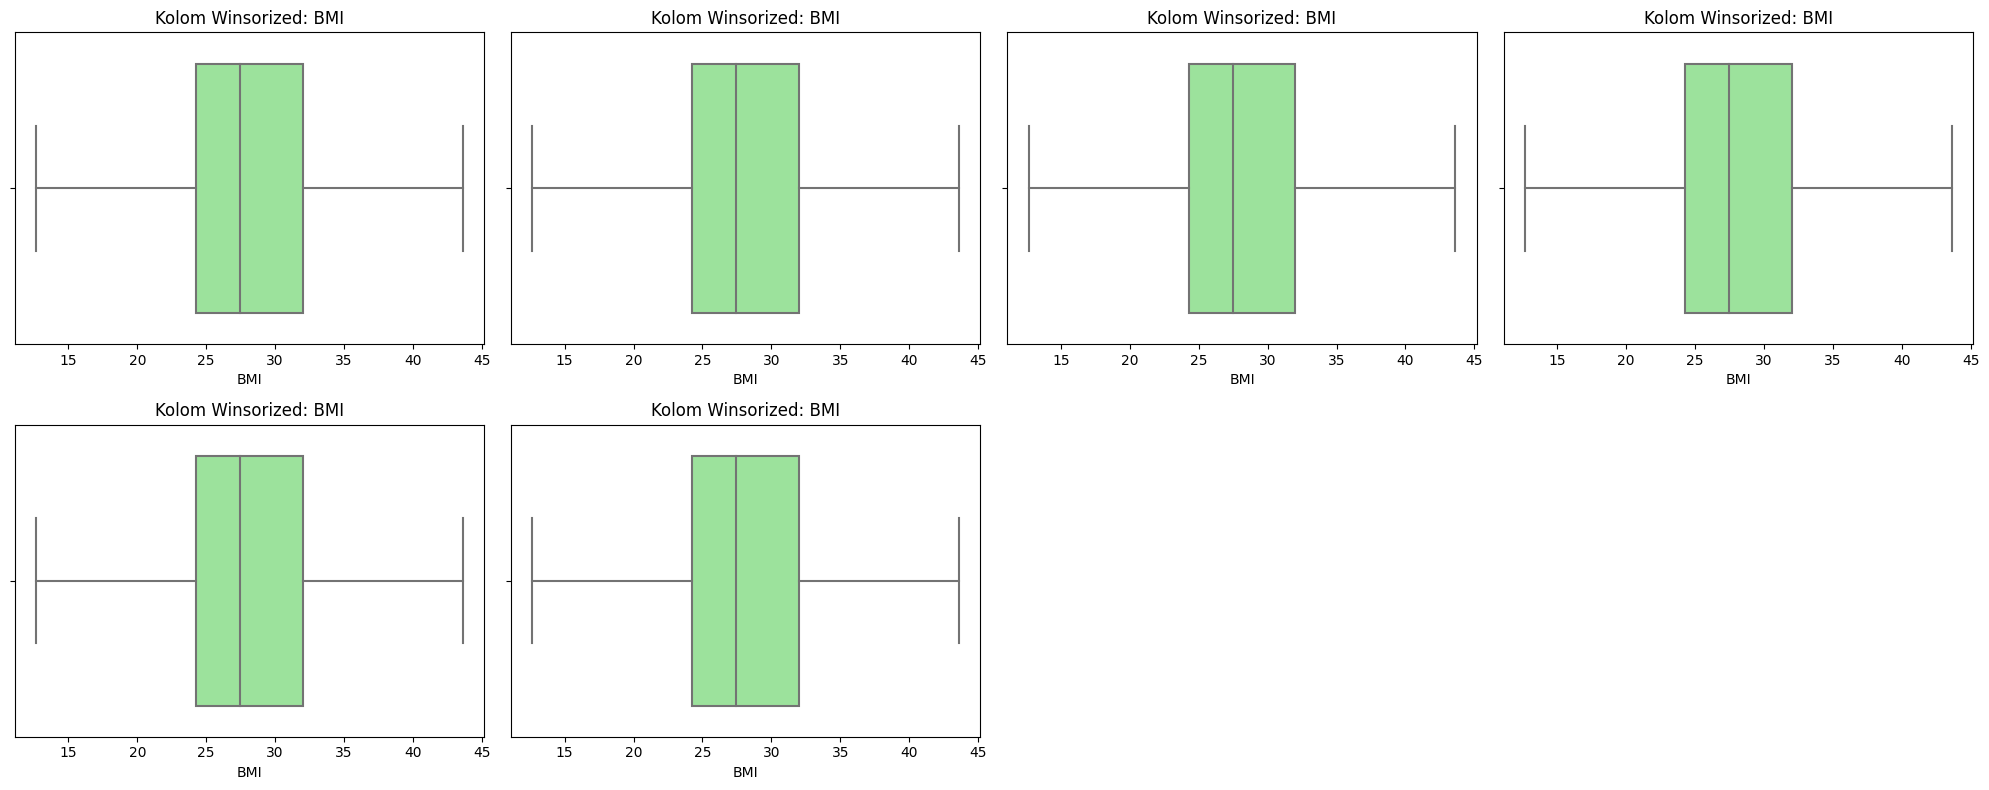

In [17]:
def winsorize_iqr(df_selected, column):
    Q1 = df_selected[column].quantile(0.25)
    Q3 = df_selected[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    kolom_winsorized = df_selected[column].copy()
    kolom_winsorized[kolom_winsorized < lower_bound] = lower_bound
    kolom_winsorized[kolom_winsorized > upper_bound] = upper_bound
    
    return kolom_winsorized
    

for column in numerik_valid:
    df_selected.loc[:, column] = winsorize_iqr(df_selected, column)

print("Data asli setelah Winsorization:")
print(df_selected[numerik_valid].describe())

n_cols = 4
n_rows = (len(numerik_valid) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, kolom in enumerate(numerik_valid):
    sns.boxplot(data=df_selected, x=column, ax=axes[i], color='lightgreen')
    axes[i].set_title(f"Kolom Winsorized: {column}")

for j in range(len(numerik_valid), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Processing Data**

In [18]:
print(df_selected.duplicated().sum())
df_selected = df_selected.drop_duplicates()

57


In [19]:
df_selected['HadHeartAttack'] = df_selected['HadHeartAttack'].map({'No': 0, 'Yes': 1}).astype('Int64')

In [20]:
X = df_selected.drop(columns = ['HadHeartAttack'])
y = df_selected['HadHeartAttack']

In [21]:
'HadHeartAttack' in X.columns

False

Split data dengan data train 70%, validasi 15%, Testing 15%

In [22]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=(70/85), random_state=42, stratify=y_temp)


In [23]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (35797, 19)
Validation: (167055, 19)
Test: (35798, 19)


## **Data Encoding**

In [24]:
binary_features = [
    'Sex', 'PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'AlcoholDrinkers'
]

ordinal_features = ['GeneralHealth', 'AgeCategory', 'SmokerStatus']

nominal_features = ['HadDiabetes']

In [25]:
def encode_data(df_selected, binary_features, ordinal_features, nominal_features, all_columns=None):
    df_selected = df_selected.copy()
    
    mapping_bin = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
    for col in binary_features:
        if col in df_selected.columns:
            df_selected[col] = df_selected[col].map(mapping_bin).astype("Int64")

    # Ordinal mapping
    ord_maps = {
        'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
        'AgeCategory': [
            'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
            'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
            'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
            'Age 80 or older'
        ],
        'SmokerStatus': [
            'Never smoked',
            'Former smoker',
            'Current smoker - now smokes some days',
            'Current smoker - now smokes every day'
        ]
    }
    for col, order in ord_maps.items():
        if col in df_selected.columns:
            df_selected[col] = pd.Categorical(
                df_selected[col], categories=order, ordered=True
            ).codes

    # One-hot encoding untuk nominal
    df_selected = pd.get_dummies(
        df_selected,
        columns=[c for c in nominal_features if c in df_selected.columns],
        drop_first=True
    )

    # Boolean → int
    bool_cols = df_selected.select_dtypes(include='bool').columns
    if len(bool_cols) > 0:
        df_selected[bool_cols] = df_selected[bool_cols].astype(int)

    # Pastikan semua dataset punya kolom yang sama (align dengan train)
    if all_columns is not None:
        df_selected = df_selected.reindex(columns=all_columns, fill_value=0)

    return df_selected

X_train_enc = encode_data(X_train, binary_features, ordinal_features, nominal_features)
all_columns = X_train_enc.columns.tolist()

X_val_enc   = encode_data(X_val, binary_features, ordinal_features, nominal_features, all_columns=all_columns)
X_test_enc  = encode_data(X_test, binary_features, ordinal_features, nominal_features, all_columns=all_columns)

print("Shape Train:", X_train_enc.shape)
print("Shape Val:", X_val_enc.shape)
print("Shape Test:", X_test_enc.shape)

# Pastikan tidak ada NaN
print("NaN Train:", X_train_enc.isna().sum().sum())
print("NaN Val:", X_val_enc.isna().sum().sum())
print("NaN Test:", X_test_enc.isna().sum().sum())

Shape Train: (35797, 21)
Shape Val: (167055, 21)
Shape Test: (35798, 21)
NaN Train: 0
NaN Val: 0
NaN Test: 0


## **Normalisas Numerik**

In [26]:
numerical_features = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
    'HeightInMeters', 'WeightInKilograms', 'BMI'
]

In [27]:
scaler = MinMaxScaler()

X_train_enc[numerical_features] = scaler.fit_transform(X_train_enc[numerical_features])
X_val_enc[numerical_features]   = scaler.transform(X_val_enc[numerical_features])
X_test_enc[numerical_features]  = scaler.transform(X_test_enc[numerical_features])


In [28]:
X_train_enc.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,HadCOPD,...,HadKidneyDisease,SmokerStatus,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)"
127259,0,2,0.000000,0.00,1,0.625,0,0,0,0,...,0,1,8,0.275000,0.569066,0.772610,0,1,0,0
119545,1,2,0.000000,0.80,0,0.250,0,0,0,0,...,0,0,0,0.625000,0.719886,0.680233,0,0,0,0
67811,0,2,0.000000,0.00,0,0.500,0,0,0,0,...,0,0,0,0.441667,0.296127,0.309109,0,0,0,0
200646,1,3,0.533333,0.16,1,0.500,0,0,0,0,...,0,0,0,0.708333,0.719886,0.620478,0,0,0,0
190905,0,3,0.000000,0.16,1,0.625,0,0,0,0,...,0,0,10,0.408333,0.288810,0.316537,1,0,0,0


In [29]:
# Pastikan semua input features dalam float32 (numpy)
X_train_enc = X_train_enc.to_numpy().astype("float32") if hasattr(X_train_enc, "to_numpy") else X_train_enc.astype("float32")
X_val_enc   = X_val_enc.to_numpy().astype("float32")   if hasattr(X_val_enc, "to_numpy") else X_val_enc.astype("float32")
X_test_enc  = X_test_enc.to_numpy().astype("float32")  if hasattr(X_test_enc, "to_numpy") else X_test_enc.astype("float32")

# Pastikan label dalam int64 (numpy)
y_train = y_train.to_numpy().astype("int64") if hasattr(y_train, "to_numpy") else y_train.astype("int64")
y_val   = y_val.to_numpy().astype("int64")   if hasattr(y_val, "to_numpy") else y_val.astype("int64")
y_test  = y_test.to_numpy().astype("int64")  if hasattr(y_test, "to_numpy") else y_test.astype("int64")

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_total = len(y_train)
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

class_weights = torch.tensor([n_total/n_neg, n_total/n_pos], 
                             dtype=torch.float32).to(device)

loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

# **Model**

In [31]:
best_model = TabNetClassifier(
    n_d= 32,
    n_a= 32,
    n_steps= 5,
    gamma= 1.0250373985553805,
    lambda_sparse= 1.8686789877610042e-05,
    n_independent= 5,
    n_shared= 2,
    momentum= 0.2642946973533172,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.010463397747096386),
    mask_type="entmax",
    seed=42, 
    verbose=1
)

history = best_model.fit(
    X_train=X_train_enc, y_train=y_train,
    eval_set=[(X_train_enc, y_train), (X_val_enc, y_val)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy','auc'],
    loss_fn=loss_fn,
    max_epochs=200,
    patience=50,
    batch_size=256,
    virtual_batch_size=128,
    drop_last=False
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.7001  | train_accuracy: 0.84398 | train_auc: 0.86557 | val_accuracy: 0.84261 | val_auc: 0.85913 |  0:00:24s
epoch 1  | loss: 0.4746  | train_accuracy: 0.77367 | train_auc: 0.87394 | val_accuracy: 0.77256 | val_auc: 0.8673  |  0:00:49s
epoch 2  | loss: 0.45306 | train_accuracy: 0.8287  | train_auc: 0.88122 | val_accuracy: 0.82678 | val_auc: 0.87406 |  0:01:13s
epoch 3  | loss: 0.44393 | train_accuracy: 0.82202 | train_auc: 0.88223 | val_accuracy: 0.82037 | val_auc: 0.87354 |  0:01:37s
epoch 4  | loss: 0.441   | train_accuracy: 0.80227 | train_auc: 0.88285 | val_accuracy: 0.80002 | val_auc: 0.87419 |  0:02:01s
epoch 5  | loss: 0.43945 | train_accuracy: 0.84985 | train_auc: 0.88253 | val_accuracy: 0.84739 | val_auc: 0.87499 |  0:02:25s
epoch 6  | loss: 0.43756 | train_accuracy: 0.80113 | train_auc: 0.88283 | val_accuracy: 0.80194 | val_auc: 0.87632 |  0:02:49s
epoch 7  | loss: 0.43863 | train_accuracy: 0.85041 | train_auc: 0.88288 | val_accuracy: 0.84895 | val_auc: 0.87

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


AUC TabNet: 0.8741


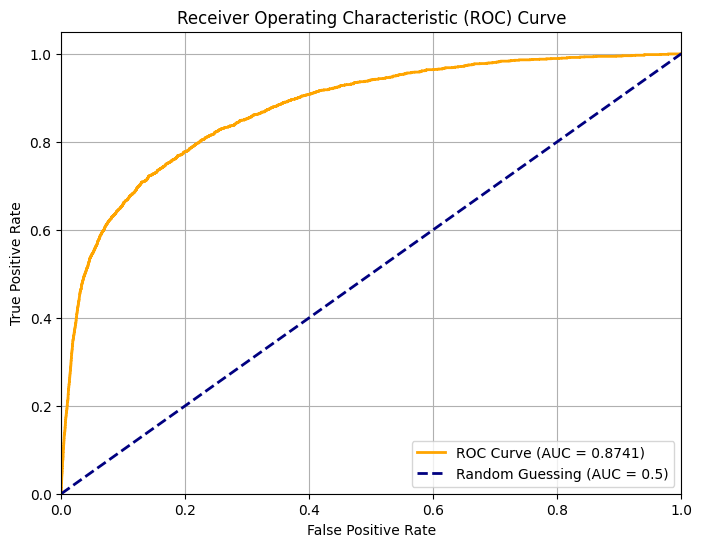

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_proba_tabnet = best_model.predict_proba(X_test_enc)[:, 1]

auc_tabnet = roc_auc_score(y_test, y_pred_proba_tabnet)
print(f"AUC TabNet: {auc_tabnet:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tabnet)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {auc_tabnet:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Classification Report (TabNet - Test Set):
              precision    recall  f1-score   support

          No       0.98      0.85      0.91     33784
         Yes       0.22      0.73      0.34      2014

    accuracy                           0.84     35798
   macro avg       0.60      0.79      0.62     35798
weighted avg       0.94      0.84      0.88     35798


Balanced Accuracy Score: 0.7892


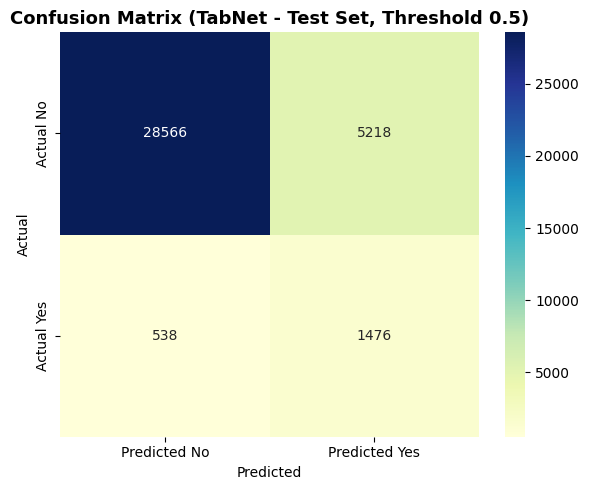

In [33]:
from sklearn.metrics import balanced_accuracy_score

y_test_pred = (best_model.predict_proba(X_test_enc)[:, 1] > 0.5).astype(int)

print("Classification Report (TabNet - Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
print(f"\nBalanced Accuracy Score: {balanced_acc:.4f}")

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (TabNet - Test Set, Threshold 0.5)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Best Threshold from Youden’s J: 0.514, J = 0.581

Classification Report (TabNet - Test Set, Optimal Threshold):
              precision    recall  f1-score   support

          No       0.98      0.86      0.92     33784
         Yes       0.23      0.72      0.35      2014

    accuracy                           0.85     35798
   macro avg       0.61      0.79      0.63     35798
weighted avg       0.94      0.85      0.88     35798

Balanced Accuracy Score: 0.7905


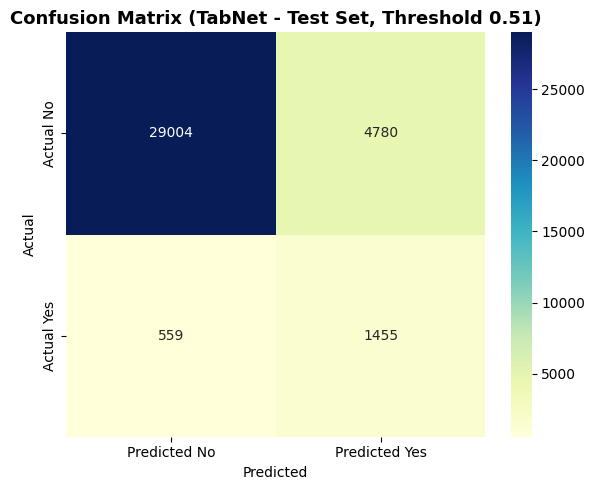

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, roc_curve

def find_best_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    specificity = 1 - fpr
    J = tpr + specificity - 1
    ix = np.argmax(J)
    return thresholds[ix], J[ix]

# === Prediksi probabilitas (pastikan X_test_enc jadi numpy array) ===
X_test_np = X_test_enc.values if hasattr(X_test_enc, "values") else X_test_enc
y_prob = best_model.predict_proba(X_test_np)[:, 1]

# Cari threshold terbaik
best_thresh, best_J = find_best_threshold(y_test, y_prob)
print(f"Best Threshold from Youden’s J: {best_thresh:.3f}, J = {best_J:.3f}")

# Terapkan threshold baru
y_test_pred = (y_prob >= best_thresh).astype(int)

# === Evaluasi dengan threshold baru ===
print("\nClassification Report (TabNet - Test Set, Optimal Threshold):")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
print(f"Balanced Accuracy Score: {balanced_acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title(f'Confusion Matrix (TabNet - Test Set, Threshold {best_thresh:.2f})',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()